# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

from pprint import pprint

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
url = "http://api.openweathermap.org/data/2.5/weather?"

tempunits="imperial"

City=[]
Cloudiness=[]
Country=[]
Date=[]
Humidity=[]
Lat=[]
Lng=[]
MaxTemp=[]
WindSpeed=[]

setnumber=0
recordnumber=0

print("Beginning Data Retrieval")     
print("-----------------------------")
for city in cities:
    try:
        query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + tempunits
        weather_response = requests.get(query_url).json()
        
        #append lists - need to store to put info into df
        City.append(weather_response["name"])
        Cloudiness.append(weather_response["clouds"]["all"])
        Country.append(weather_response["sys"]["country"])
        Date.append(weather_response["dt"])
        Humidity.append(weather_response["main"]["humidity"])
        Lat.append(weather_response["coord"]["lat"])
        Lng.append(weather_response["coord"]["lon"])
        MaxTemp.append(weather_response["main"]["temp_max"])
        WindSpeed.append(weather_response["wind"]["speed"])
        
        if recordnumber>49:
            recordnumber=1
            setnumber+=1
        elif recordnumber<=49:
            recordnumber+=1
            
        print(f'Processing Record {recordnumber} of Set {setnumber} | {city}')
        
    except:
        print("City not found. Skipping...")
        
print("------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 0 | new norfolk
Processing Record 2 of Set 0 | kahului
Processing Record 3 of Set 0 | lebu
Processing Record 4 of Set 0 | dharchula
Processing Record 5 of Set 0 | balkhash
City not found. Skipping...
Processing Record 6 of Set 0 | lufilufi
Processing Record 7 of Set 0 | luderitz
Processing Record 8 of Set 0 | dikson
Processing Record 9 of Set 0 | qaanaaq
Processing Record 10 of Set 0 | hilo
City not found. Skipping...
Processing Record 11 of Set 0 | kodiak
Processing Record 12 of Set 0 | davila
Processing Record 13 of Set 0 | rocha
Processing Record 14 of Set 0 | severo-kurilsk
Processing Record 15 of Set 0 | vanavara
Processing Record 16 of Set 0 | mataura
Processing Record 17 of Set 0 | castro
Processing Record 18 of Set 0 | ushuaia
Processing Record 19 of Set 0 | starokozache
Processing Record 20 of Set 0 | salamiyah
Processing Record 21 of Set 0 | pevek
Processing Record 22 of Set 0 | nikolskoye
Proce

Processing Record 36 of Set 3 | malindi
Processing Record 37 of Set 3 | olafsvik
Processing Record 38 of Set 3 | cabo san lucas
Processing Record 39 of Set 3 | fortuna
Processing Record 40 of Set 3 | santa maria
Processing Record 41 of Set 3 | richards bay
Processing Record 42 of Set 3 | airai
Processing Record 43 of Set 3 | midland
Processing Record 44 of Set 3 | lavrentiya
City not found. Skipping...
Processing Record 45 of Set 3 | javanrud
Processing Record 46 of Set 3 | aklavik
Processing Record 47 of Set 3 | shache
Processing Record 48 of Set 3 | acari
Processing Record 49 of Set 3 | shahpur
Processing Record 50 of Set 3 | nome
Processing Record 1 of Set 4 | port blair
Processing Record 2 of Set 4 | mount isa
Processing Record 3 of Set 4 | alta floresta
Processing Record 4 of Set 4 | ibra
City not found. Skipping...
City not found. Skipping...
Processing Record 5 of Set 4 | ulladulla
Processing Record 6 of Set 4 | aurangabad
Processing Record 7 of Set 4 | piacabucu
Processing Reco

City not found. Skipping...
Processing Record 26 of Set 7 | constantine
Processing Record 27 of Set 7 | altamont
Processing Record 28 of Set 7 | srednekolymsk
Processing Record 29 of Set 7 | bollnas
Processing Record 30 of Set 7 | batsfjord
Processing Record 31 of Set 7 | port hedland
Processing Record 32 of Set 7 | lucea
Processing Record 33 of Set 7 | filadelfia
Processing Record 34 of Set 7 | nenagh
Processing Record 35 of Set 7 | talara
Processing Record 36 of Set 7 | praia da vitoria
Processing Record 37 of Set 7 | the valley
Processing Record 38 of Set 7 | skibbereen
Processing Record 39 of Set 7 | hukuntsi
Processing Record 40 of Set 7 | sao joao da barra
Processing Record 41 of Set 7 | poya
Processing Record 42 of Set 7 | iqaluit
Processing Record 43 of Set 7 | yar-sale
Processing Record 44 of Set 7 | odienne
Processing Record 45 of Set 7 | mandalgovi
Processing Record 46 of Set 7 | san policarpo
Processing Record 47 of Set 7 | tuatapere
Processing Record 48 of Set 7 | calbuco


Processing Record 17 of Set 11 | chulman
Processing Record 18 of Set 11 | bogo
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
weather_information={"City":City, "Cloudiness":Cloudiness, "Country": Country, "Date": Date, "Humidity": Humidity,"Lat":Lat,
                    "Lng":Lng,"Max Temp":MaxTemp, "Wind Speed":WindSpeed}
weather_df=pd.DataFrame(weather_information)
weather_df.count()

City          568
Cloudiness    568
Country       568
Date          568
Humidity      568
Lat           568
Lng           568
Max Temp      568
Wind Speed    568
dtype: int64

In [16]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,New Norfolk,11,AU,1586387195,81,-42.78,147.06,52.00,6.93
1,Kahului,40,US,1586387280,48,20.89,-156.47,84.20,10.29
2,Lebu,2,CL,1586387280,89,-37.62,-73.65,53.67,2.21
3,Dhārchula,1,IN,1586387280,24,29.85,80.53,52.12,9.69
4,Balkhash,100,KZ,1586387280,63,46.84,74.98,37.72,13.73


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

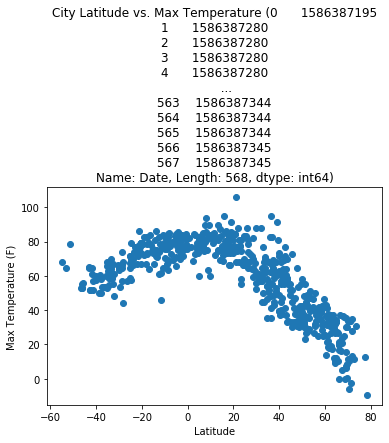

In [17]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"])
plt.title(f'City Latitude vs. Max Temperature ({weather_df["Date"]})')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#### Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

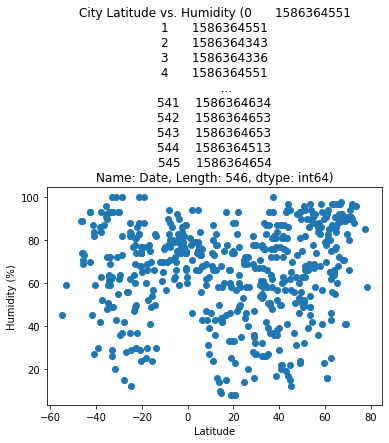

In [9]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"])
plt.title(f'City Latitude vs. Humidity ({weather_df["Date"]})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

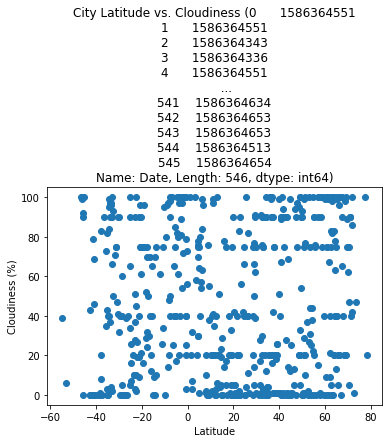

In [10]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"])
plt.title(f'City Latitude vs. Cloudiness (#4/8 with time package#)')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

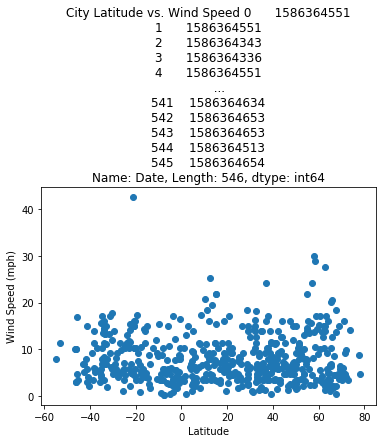

In [11]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"])
plt.title(f'City Latitude vs. Wind Speed {weather_df["Date"]}')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


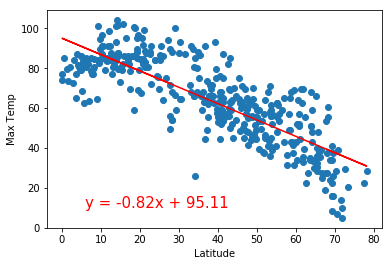

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


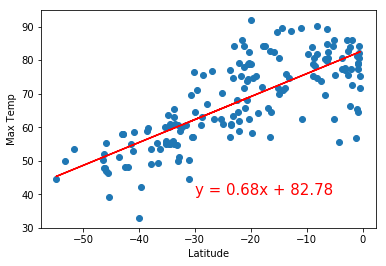

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


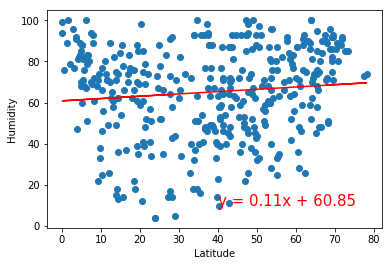

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


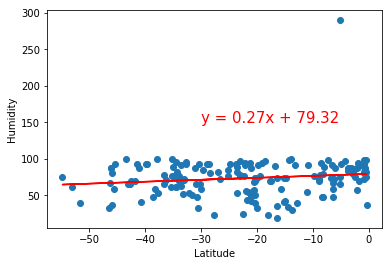

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


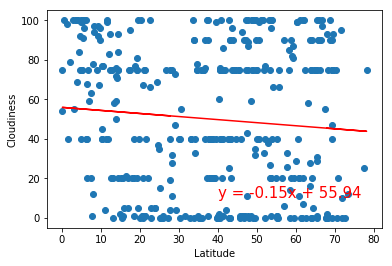

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


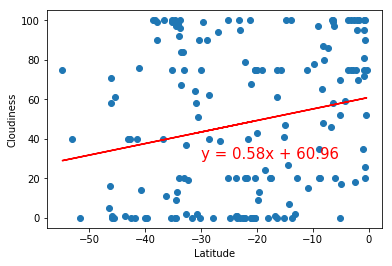

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


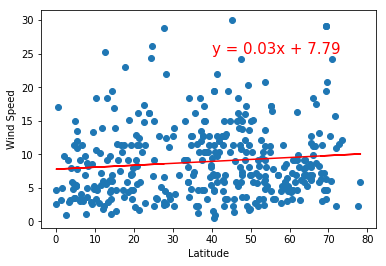

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


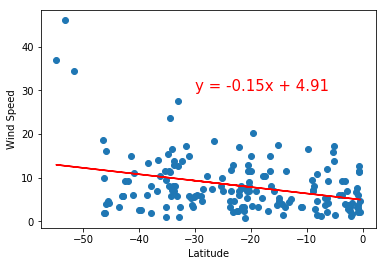